In [1]:
# Required python packages:
import sqlite3
import pandas as pd
import re
import numpy as np
import seaborn as sns
import math
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [2]:
# Importing dataset:
df = pd.read_csv("indeedjobs2022.csv")

In [3]:
# Prevewing the values in each feature:
df.apply(lambda col: col.unique())

# Row count
print(len(df))

3701


In [4]:
# Remove useless features 
df.drop(['Salary', 'Reviews', 'CompanyLink', 'Stars', 'JobLink', 'CompanyLink', 'DatePosted'], axis=1, inplace=True)

In [5]:
#  Selecting features with missing values 
NA = [(c, df[c].isna().mean()*100) for c in df]
NA = pd.DataFrame(NA, columns=["column_name", "percentage"])

# Display the percentage of missing values in each feature
NA = NA[NA.percentage > 0]
NA.sort_values("percentage", ascending=False)

,column_name,percentage
6,Remote,77.384491
5,JobType,32.504728
2,Location,7.430424
1,Company,2.188598
0,Title,1.648203
4,Description,1.648203


In [6]:
df = df.drop_duplicates(subset=['Description'], keep='last')

In [7]:
# Row count
print(len(df))

# Prevewing the values in each feature
print(df.apply(lambda col: col.unique()))

2116
Title          [Master Data Analyst, Business Intelligence An...
Company        [Robert Half, Vault Credit Corporation, Adecco...
Location       [Calgary, AB, Montréal, QC, Ottawa, ON, Delta,...
ExtractDate    [2022-06-22, 2022-06-23, 2022-06-25, 2022-07-0...
Description    [Our fast paced client in Calgary is currently...
JobType        [Temporary, Fixed term contract, nan, Fixed te...
Remote          [nan, Remote, Hybrid remote, Temporarily remote]
dtype: object


In [8]:
#  Selecting features with missing values 
NA = [(c, df[c].isna().mean()*100) for c in df]
NA = pd.DataFrame(NA, columns=["column_name", "percentage"])

# Display the percentage of missing values in each feature 
NA = NA[NA.percentage > 0]
NA.sort_values("percentage", ascending=False)

,column_name,percentage
6,Remote,77.835539
5,JobType,34.357278
2,Location,4.962193
1,Company,0.803403
0,Title,0.047259
4,Description,0.047259


In [9]:
#df.Description.str.lower().head(8)  # Convert all comments to lowercase

In [10]:
dfl = df.Title.str.lower()
data_analyst = dfl.str.contains("data analyst")
#business_intelligence = dfl.str.contains("business intelligence")
#senior_analyst = dfl.str.contains("senior analyst")
#business_analyst = dfl.str.contains("business analyst")
#payroll_analyst = dfl.str.contains("payroll analyst")
#security_analyst = dfl.str.contains("security analyst")
#analyst = dfl.str.contains("analyst")

df['data_analyst'] = data_analyst
#df['business_intelligence'] = business_intelligence
#df['senior_analyst'] = senior_analyst
#df['business_analyst'] = business_analyst
#df['payroll_analyst'] = payroll_analyst
#df['security_analyst'] = security_analyst
#df['analyst'] = analyst

In [11]:
data_analyst = round(((np.count_nonzero(data_analyst))/(df.Description.count())*100), 3)
#business_intelligence = round(((np.count_nonzero(business_intelligence))/(df.Description.count())*100), 3)
#senior_analyst = round(((np.count_nonzero(senior_analyst))/(df.Description.count())*100), 3)
#business_analyst = round(((np.count_nonzero(business_analyst))/(df.Description.count())*100), 3)
#payroll_analyst = round(((np.count_nonzero(payroll_analyst))/(df.Description.count())*100), 3)
#security_analyst = round(((np.count_nonzero(security_analyst))/(df.Description.count())*100), 3)
#analyst = round(((np.count_nonzero(analyst))/(df.Description.count())*100), 3)

In [12]:
#df2 = pd.DataFrame({"Name":['data_analyst', 'business_intelligence', 'senior_analyst', 'business_analyst', 'payroll_analyst', 'security_analyst', 'analyst'],
                 #  "Percentage":[data_analyst, business_intelligence, senior_analyst, business_analyst, payroll_analyst, security_analyst, analyst]})

In [13]:
df = df[df['data_analyst'] == True]

In [14]:
dfl = df.Description.str.lower()
python = dfl.str.contains("python")
powerbi = dfl.str.contains("power bi")
tableau = dfl.str.contains("tableau")
r = dfl.str.contains(" r ")
bigquery = dfl.str.contains("bigquery")
azure = dfl.str.contains("azure")
googlesheets = dfl.str.contains("google sheets")
aws = dfl.str.contains("aws ")
sql = dfl.str.contains("sql")
excel = dfl.str.contains("excel")
java = dfl.str.contains("java")
scala = dfl.str.contains("scala")

df['python'] = python
df['powerbi'] = powerbi
df['tableau'] = tableau
df['r'] = r
df['bigquery'] = bigquery
df['azure'] = azure
df['googlesheets'] = googlesheets
df['aws'] = aws
df['sql'] = sql
df['excel'] = excel
df['java'] = java
df['scala'] = scala

In [15]:
python = round(((np.count_nonzero(python))/(df.Description.count())), 3)
powerbi = round(((np.count_nonzero(powerbi))/(df.Description.count())), 3)
tableau = round(((np.count_nonzero(tableau))/(df.Description.count())), 3)
r = round(((np.count_nonzero(r))/(df.Description.count())), 3)
bigquery = round(((np.count_nonzero(bigquery))/(df.Description.count())), 3)
azure = round(((np.count_nonzero(azure))/(df.Description.count())), 3)
googlesheets = round(((np.count_nonzero(googlesheets))/(df.Description.count())), 3)
aws = round(((np.count_nonzero(aws))/(df.Description.count())), 3)
sql = round(((np.count_nonzero(sql))/(df.Description.count())), 3)
excel = round(((np.count_nonzero(excel))/(df.Description.count())), 3)
java = round(((np.count_nonzero(java))/(df.Description.count())), 3)
scala = round(((np.count_nonzero(scala))/(df.Description.count())), 3)

In [16]:
df1 = pd.DataFrame({"Name":['python', 'powerbi', 'tableau', 'r', 'bigquery', 'azure', 'googlesheets', 'aws', 'sql', 'excel', 'java', 'scala'],
                   "Percentage":[python, powerbi, tableau, r, bigquery, azure, googlesheets, aws, sql, excel, java, scala]})

In [17]:
df1.sort_values("Percentage", ascending=False)

,Name,Percentage
9,excel,0.703
8,sql,0.635
0,python,0.387
2,tableau,0.300
1,powerbi,0.234
11,scala,0.093
5,azure,0.074
3,r,0.068
7,aws,0.060
10,java,0.054


In [18]:
df['postal'] = df['Location'].str[-2:]
print(df)

                                             Title  \
0                              Master Data Analyst   
5     Clinical Data Analyst - Blood Gas Specialist   
8                Clinical Data Analyst - Blood Gas   
246                            Data Analyst Mentor   
248                   HR Data Analyst/BI Developer   
...                                            ...   
3362                          Senior Data Analysts   
3365     Senior Business Intelligence Data Analyst   
3446     Senior Anti Money Laundering Data Analyst   
3471            Senior Data Analyst, Oncology PRCC   
3579            Data Analyst / Analyste de données   

                           Company                  Location ExtractDate  \
0                      Robert Half               Calgary, AB  2022-06-22   
5                    Adecco Canada                Ottawa, ON  2022-06-22   
8     MaxSys Staffing & Consulting                Ottawa, ON  2022-06-22   
246                        AzureHR             

<AxesSubplot:xlabel='Remote', ylabel='count'>

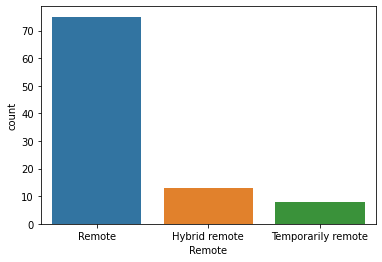

In [19]:
sns.countplot(x="Remote", data=df)

In [20]:
df.Description.str.len().head(20)  # Get the length of all comments

0      2386
5      2376
8      1532
246    1904
248    5400
252    3278
265    5438
271    3236
273    4853
287    3149
291    2228
292    2595
296    3971
318    6290
369    5235
377    2325
399    6265
424    5032
425    5943
473    4674
Name: Description, dtype: int64

In [21]:
print(df)

                                             Title  \
0                              Master Data Analyst   
5     Clinical Data Analyst - Blood Gas Specialist   
8                Clinical Data Analyst - Blood Gas   
246                            Data Analyst Mentor   
248                   HR Data Analyst/BI Developer   
...                                            ...   
3362                          Senior Data Analysts   
3365     Senior Business Intelligence Data Analyst   
3446     Senior Anti Money Laundering Data Analyst   
3471            Senior Data Analyst, Oncology PRCC   
3579            Data Analyst / Analyste de données   

                           Company                  Location ExtractDate  \
0                      Robert Half               Calgary, AB  2022-06-22   
5                    Adecco Canada                Ottawa, ON  2022-06-22   
8     MaxSys Staffing & Consulting                Ottawa, ON  2022-06-22   
246                        AzureHR             

In [22]:
df.to_csv("indeedjobs2022cleaned.csv", index = False)

In [23]:
df1.to_csv("indeedjobs2022toolpercentage.csv", index = False)

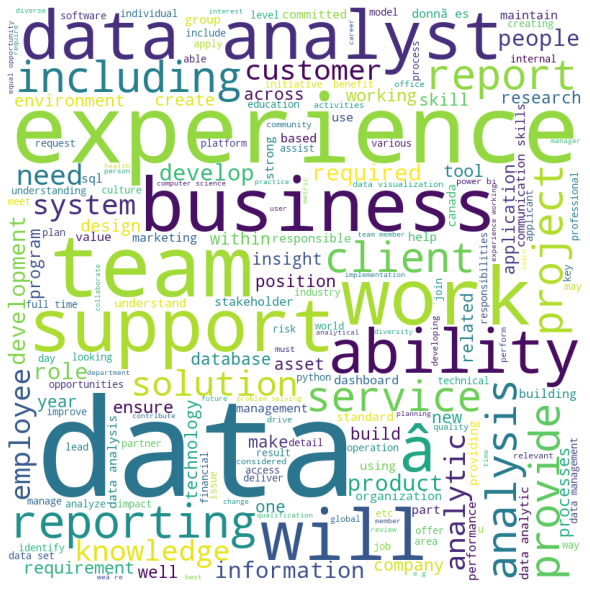

In [25]:
# Reads 'Youtube04-Eminem.csv' file
df = pd.read_csv(r"indeedjobs2022cleaned.csv", encoding ="latin-1")
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.Description:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()